In [48]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib_venn import venn3
from wordcloud import WordCloud, STOPWORDS

In [64]:
url = 'https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/14_SeveralIndepLists.csv'
data = pd.read_csv(url,sep = ' ')
data = data.dropna()
data


,artist,song,word
0,booba,113,paroles.net
1,booba,113,above
2,booba,113,lyrics
3,booba,113,function
4,booba,113,var
...,...,...,...
11523,nekfeu,squa,r.readystate
11524,nekfeu,squa,r.onreadystatechange
11526,nekfeu,squa,r.onload
11527,nekfeu,squa,s.parentnode.insertbefore


In [65]:
to_remove = ["_|[0-9]|\\.|function|^id|script|var|div|null|typeof|opts|if|^r$|undefined|false|loaded|true|settimeout|eval|else|artist"]

data["word"].str.replace("_|[^0-9].|function|^id|script|var|div|null|typeof|opts|if|^r$|undefined|false|loaded|true|settimeout|eval|else|artist", '')

C:\Users\susim\AppData\Local\Temp/ipykernel_25852/756482796.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data["word"].str.replace("_|[^0-9].|function|^id|script|var|div|null|typeof|opts|if|^r$|undefined|false|loaded|true|settimeout|eval|else|artist", '')


0        t
1        e
2         
3         
4        r
        ..
11523     
11524     
11526     
11527    e
11528     
Name: word, Length: 11450, dtype: object

var function 0 r.readystate if nekfeu plus a r script r.onreadystatechange comme opts div false you ça c'est si undefined typeof quand j'ai be i'll calling 39383816 cf.showasyncad complete r.onload s.parentnode.insertbefore faire opts.div_id cf_async_ adunit_id above song artist lyrics div_id loaded showad.js showads id document.write window.cf 999999999 else cf_async math.random


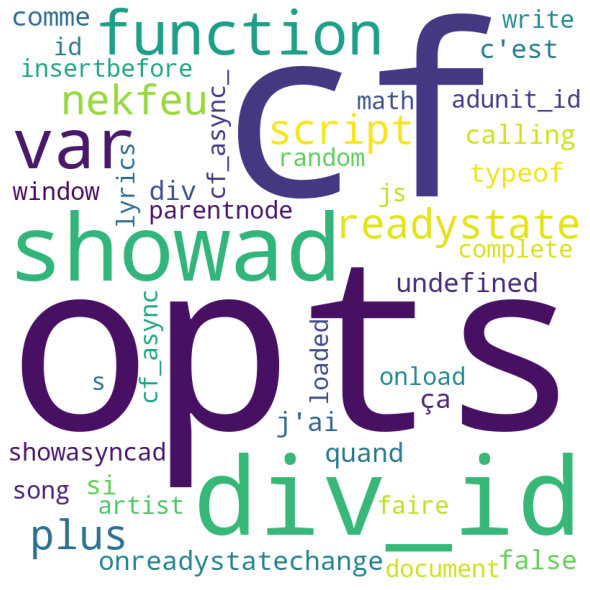

In [67]:
mywords = data[data["artist"] == "nekfeu"]["word"].value_counts().nlargest(50).index

#print(mywords.values)
stopwords = set(STOPWORDS)
text = " ".join(cat for cat in mywords)
print(text)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

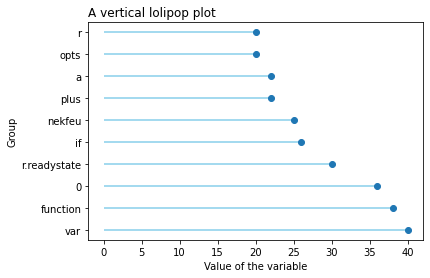

In [43]:
mywords = data[data["artist"] == "nekfeu"]["word"].value_counts().nlargest(10)
my_range=range(1,len(mywords.index)+1)
plt.hlines(y=my_range, xmin=0, xmax=mywords.values, color='skyblue')
plt.plot(mywords.values, my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, mywords.index)
plt.title("A vertical lolipop plot", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

# Show the plot
plt.show()

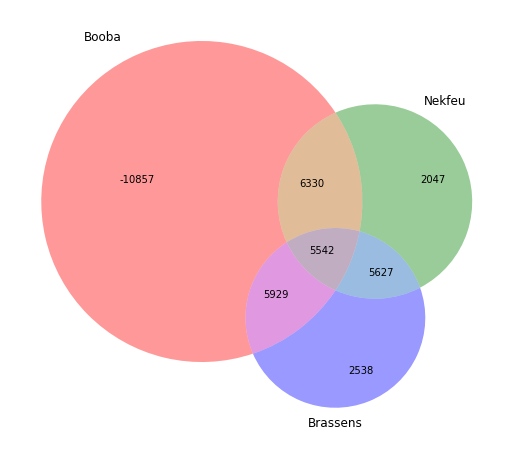

In [57]:
booba_words = data[data["artist"] == "booba"]["word"].tolist()
nekfeu_words = data[data["artist"] == "nekfeu"]["word"].tolist()
brassens_words = data[data["artist"] == "georges-brassens"]["word"].tolist()
common1 = data[data['word'].isin(booba_words) & data['word'].isin(nekfeu_words)]['word'].tolist()
common2 = data[data['word'].isin(nekfeu_words) & data['word'].isin(brassens_words)]['word'].tolist()
common3 = data[data['word'].isin(booba_words) & data['word'].isin(brassens_words)]['word'].tolist()
common4 = data[data['word'].isin(booba_words) & data['word'].isin(brassens_words) & data['word'].isin(nekfeu_words)]['word'].tolist()

plt.figure(figsize=(15,8))
# Create the venn diagram
v = venn3(subsets = [set(booba_words), set(nekfeu_words), set(brassens_words)], set_labels = ('Booba', 'Nekfeu', 'Brassens'))

# Customize the plot
v.get_label_by_id('100').set_text(len(booba_words))
v.get_label_by_id('010').set_text(len(nekfeu_words))
v.get_label_by_id('001').set_text(len(brassens_words))
v.get_label_by_id('110').set_text(len(common1))
v.get_label_by_id('101').set_text(len(common3))
v.get_label_by_id('011').set_text(len(common2))
v.get_label_by_id('111').set_text(len(common4))

plt.show()